this notebook looks at two different ways in which we can analyze the effects of ebikes by examining changes: 
- Period over period (2018 only)
- Sept-November 2018 vs 2017


In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_columns = 10000
from pandas.io.json import json_normalize
import datetime

In [4]:
#look at period over period change 

In [3]:
#import periods before and after ebike launch
network_bef_2018 = pd.read_csv('undir_neighborhood_network_2018-06-11-2018-08-19.csv')
network_aft_2018 = pd.read_csv('undir_neighborhood_network_2018-08-20-2018-10-28.csv')
nta = pd.read_csv('neighborhood_nodeslist.csv')

In [73]:
#add unique identifier to merge on
network_bef_2018['concat'] = network_bef_2018['source'].astype(str) + '-' + network_bef_2018['target'].astype(str)
network_aft_2018['concat'] = network_aft_2018['source'].astype(str) + '-' + network_aft_2018['target'].astype(str)

In [74]:
network_aft_2018.head()

,source,target,weight,concat
0,BK09,BK09,10857,BK09-BK09
1,BK09,BK32,130,BK09-BK32
2,BK09,BK33,20749,BK09-BK33
3,BK09,BK35,235,BK09-BK35
4,BK09,BK37,5490,BK09-BK37


In [75]:
#rename weight colomn for the before period
network_bef_2018 = network_bef_2018[['concat','weight']]
network_bef_2018 = network_bef_2018.rename(columns={'weight':'weight_before'})
network_bef_2018.count()

concat           1048
weight_before    1048
dtype: int64

In [77]:
#merge both periods and get growth rate
period_over_period = pd.merge(network_bef_2018, network_aft_2018, how='left', on='concat')
#period_over_period['weight_before'] = period_over_period['weight_before'].fillna(0)
period_over_period['growth_rate'] = ((period_over_period['weight'] - period_over_period['weight_before']) / period_over_period['weight_before'])
period_over_period.head()

,concat,weight_before,source,target,weight,growth_rate
0,BK09-BK09,11374,BK09,BK09,10857.0,-0.045455
1,BK09-BK32,143,BK09,BK32,130.0,-0.090909
2,BK09-BK33,21959,BK09,BK33,20749.0,-0.055103
3,BK09-BK35,275,BK09,BK35,235.0,-0.145455
4,BK09-BK37,5770,BK09,BK37,5490.0,-0.048527


In [78]:
#add nta
nta.head()

,id,ntaname,lat,lon
0,QN72,Steinway,40.777426,-73.905408
1,BK64,Prospect Heights,40.677645,-73.967588
2,BK90,East Williamsburg,40.715371,-73.936797
3,QN31,Hunters Point-Sunnyside-West Maspeth,40.739767,-73.931191
4,MN99,park-cemetery-etc-Manhattan,40.787978,-73.954782


In [47]:
#drop na values
period_over_period = period_over_period[~period_over_period['growth_rate'].isna()]

In [48]:
period_over_period.sort_values('growth_rate', ascending=False).head()

,concat,weight_before,source,target,weight,growth_rate
203,BK37-QN72,1,BK37,QN72,12.0,11.0
645,MN03-QN72,1,MN03,QN72,10.0,9.0
643,MN03-QN70,1,MN03,QN70,8.0,7.0
56,BK32-BK72,1,BK32,BK72,7.0,6.0
60,BK32-BK78,1,BK32,BK78,7.0,6.0


In [49]:
period_over_period['growth_rate'].describe()

count    1027.000000
mean        0.090464
std         0.735724
min        -0.857143
25%        -0.128218
50%        -0.018286
75%         0.104766
max        11.000000
Name: growth_rate, dtype: float64

Text(0.5,1,'Growth Rate of Citi Bike Trips between Neighborhoods')

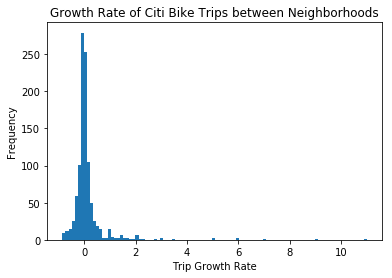

In [50]:
plt.hist(period_over_period['growth_rate'], bins=100)
plt.xlabel('Trip Growth Rate')
plt.ylabel('Frequency')
plt.title('Growth Rate of Citi Bike Trips between Neighborhoods')

In [51]:
#get only 2.5 standard deviation edges
mean = period_over_period['growth_rate'].mean()
st_dev = period_over_period['growth_rate'].std()
lower_end = mean - 2.5*st_dev
higher_end = mean + 2.5*st_dev

In [52]:
period_over_period['growth_rate'].describe()

count    1027.000000
mean        0.090464
std         0.735724
min        -0.857143
25%        -0.128218
50%        -0.018286
75%         0.104766
max        11.000000
Name: growth_rate, dtype: float64

In [55]:
period_over_period = period_over_period[period_over_period['growth_rate']>=higher_end]
period_over_period.to_csv('period_distr.csv', index=False)

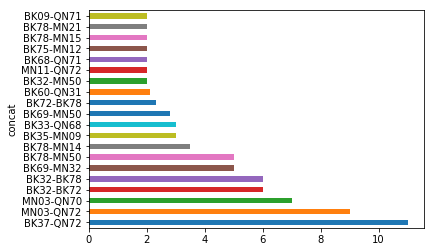

In [56]:
#period_over_period = period_over_period.sort_values('growth_rate', ascending=False)
period_over_period_bar = period_over_period.groupby('concat')['growth_rate'].mean().sort_values(ascending=False)
period_over_period_bar.plot(kind='barh')

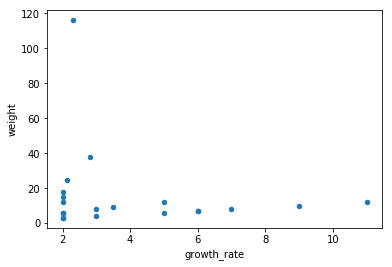

In [57]:
period_over_period_scatter = period_over_period.plot.scatter(x='growth_rate', y='weight')

In [58]:
#sept-nov 2018 vs 2017

In [59]:
#look at year over year after ebike launch 
#start 9/12 when 140 new docks were added per https://www.dnainfo.com/new-york/20170905/astoria/cit-bike-expansion-sept-12-lic-astoria-harlem-crown-heights/
#9/12/2017-10/31/2017
#9/11/2018-10/30/2018

In [60]:
network_2018 = pd.read_csv('undir_neighborhood_network_2018-09-11-2018-10-30.csv')
network_2017 = pd.read_csv('undir_neighborhood_network_2017-09-12-2017-10-31.csv')

In [61]:
#add unique identifier to merge on
network_2017['concat'] = network_2017['source'].astype(str) + '-' + network_2017['target'].astype(str)
network_2018['concat'] = network_2018['source'].astype(str) + '-' + network_2018['target'].astype(str)

In [62]:
#rename weight colomn for the before period
network_2017 = network_2017[['concat','weight']]
network_2017 = network_2017.rename(columns={'weight':'weight_before'})


In [63]:
#merge both periods and get growth rate
year_over_year = pd.merge(network_2017, network_2018, how='left', on='concat')
#period_over_period['weight_before'] = period_over_period['weight_before'].fillna(0)
year_over_year['growth_rate'] = ((year_over_year['weight'] - year_over_year['weight_before']) / year_over_year['weight_before'])
year_over_year.head()

,concat,weight_before,source,target,weight,growth_rate
0,BK09-BK09,7124,BK09,BK09,7455.0,0.046463
1,BK09-BK32,58,BK09,BK32,84.0,0.448276
2,BK09-BK33,14540,BK09,BK33,14569.0,0.001994
3,BK09-BK35,171,BK09,BK35,156.0,-0.087719
4,BK09-BK37,4248,BK09,BK37,3787.0,-0.108522


In [64]:
#drop na values
year_over_year = year_over_year[~year_over_year['growth_rate'].isna()]

In [65]:
year_over_year['growth_rate'].describe()

count    955.000000
mean       1.013121
std        2.636825
min       -0.833333
25%       -0.071774
50%        0.115702
75%        1.000000
max       32.000000
Name: growth_rate, dtype: float64

In [66]:
#get only 2.5 standard deviation edges
mean = year_over_year['growth_rate'].mean()
st_dev = year_over_year['growth_rate'].std()
lower_end = mean - 2.5*st_dev
higher_end = mean + 2.5*st_dev

In [69]:
year_over_year = year_over_year[year_over_year['growth_rate']>=higher_end]
year_over_year.to_csv('year_distr.csv', index=False)

In [71]:
year_over_year.count()

concat           27
weight_before    27
source           27
target           27
weight           27
growth_rate      27
dtype: int64

In [28]:
year_over_year.sort_values('growth_rate', ascending=False)

,concat,weight_before,source,target,weight,growth_rate
301,BK63-MN24,1,BK63,MN24,33.0,32.000000
846,MN23-QN71,1,MN23,QN71,23.0,22.000000
942,MN40-QN71,2,MN40,QN71,44.0,21.000000
188,BK37-QN70,1,BK37,QN70,19.0,18.000000
247,BK60-MN22,2,BK60,MN22,38.0,18.000000
253,BK60-QN31,1,BK60,QN31,18.0,17.000000
229,BK38-QN71,2,BK38,QN71,32.0,15.000000
847,MN23-QN72,1,MN23,QN72,16.0,15.000000
55,BK32-BK76,2,BK32,BK76,31.0,14.500000
257,BK61-BK63,51,BK61,BK63,734.0,13.392157


Text(0.5,1,'Growth Rate of Citi Bike Trips between Neighborhoods')

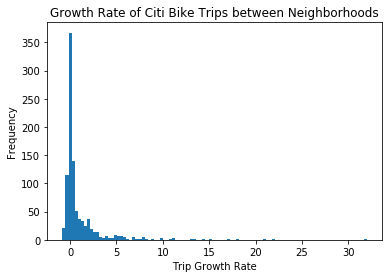

In [26]:
plt.hist(year_over_year['growth_rate'], bins=100)
plt.xlabel('Trip Growth Rate')
plt.ylabel('Frequency')
plt.title('Growth Rate of Citi Bike Trips between Neighborhoods')

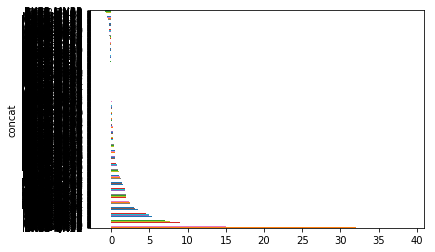

In [30]:
year_over_year_bar = year_over_year.groupby('concat')['growth_rate'].mean().sort_values(ascending=False)
year_over_year_bar.plot(kind='barh')

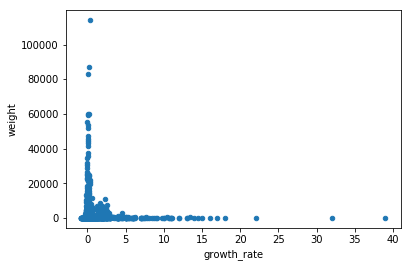

In [31]:
year_over_year_scatter = year_over_year.plot.scatter(x='growth_rate', y='weight')